# Bellabeat

In the stage of data analytics, the general process of data analytics APPASA approach will be applied in this case study,
which includes Ask, Prepare, Process, Analyze, Share and Act.

# Step 1: Ask

**Define The Business Task**

Analyze fitbit Fitness tracker data to gain insights into how consumers are using the fitbit app and discover trends and
insights for bellbeat marketing startegy.

**Business Objective**

What are some trends in smart device usage?


How could these trends help influence Bellabeat marketing strategy?

How could these trends apply to Bellabeat customers?

**Deliverables**

1.A clear summary of the business task.

2.A description of all data sources used.

3.Documentation of any cleaning or manipulation of data.

4.A summary of analysis.

5.Supporting visualizations and key findings.

6.High-level content recommendations based on the analysis.

# Step 2: Prepare

**Data stored** : The data is publicly available on Kaggle: FitBit Fitness Tracker Data.

**Does your Data ROCCC?**

Reliable(LOW) - Not reliable as it only has 33 respondents.

Original(LOW) - Third party provider.

Comprehensive(MED) - Parameters match most of Bellabeat's products' parameters.

Current(LOW)- Data is 6 years old and is not relevant.

Cited(LOW) - Data collected from third party, hence unknown.

# Step 3 : Process

I am using Python to prepare and process the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
import datetime as dt

In [2]:
os.chdir('C:\\Users\\Nihar\\Downloads')

In [3]:
df=pd.read_csv('dailyActivity_merged.csv')

In [4]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
#missing data points by per column
df.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [7]:
#convert date type
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])
df['ActivityDate'].head()

0   2016-04-12
1   2016-04-13
2   2016-04-14
3   2016-04-15
4   2016-04-16
Name: ActivityDate, dtype: datetime64[ns]

In [8]:
#NO of total unique values in Id
df['Id'].nunique()

33

In [9]:
#all columns to lower case
df.columns = [x.lower() for x in df.columns]
df.columns

Index(['id', 'activitydate', 'totalsteps', 'totaldistance', 'trackerdistance',
       'loggedactivitiesdistance', 'veryactivedistance',
       'moderatelyactivedistance', 'lightactivedistance',
       'sedentaryactivedistance', 'veryactiveminutes', 'fairlyactiveminutes',
       'lightlyactiveminutes', 'sedentaryminutes', 'calories'],
      dtype='object')

In [10]:
# create new column "dayoftheweek" to represent day name
df['dayoftheweek'] = df['activitydate'].dt.day_name()
# print 1st 5 rows to confirm
df['dayoftheweek'].head()

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: dayoftheweek, dtype: object

In [11]:
# create new column "totalminutes" containing sum of total minutes.
df['totalminutes']= df['veryactiveminutes']+df['fairlyactiveminutes']+df['lightlyactiveminutes']+df['sedentaryminutes']

In [12]:
df.head()

,id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,dayoftheweek,totalminutes
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1094
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,1033
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,1440
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,998
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,1040


In [13]:
df['totalhour']=round(df['totalminutes']/60)

In [14]:
# create new column *total_hours* by converting to hour
df['totalhour'].head()

0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
Name: totalhour, dtype: float64

# Step 4: Analyze

In [15]:
df.describe()

,id,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalminutes,totalhour
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,4.437283
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000


on average, users logged 7,637 steps or 5.4km which is not adequate.
As recommended by CDC, an adult female has to aim at least 10,000 steps or 8km per day to benefit from general health,
weight loss and fitness improvement.

Sedentary users are the majority logging on average 991 minutes or 20 hours making up 81% of total average minutes.

# Step 5: Share

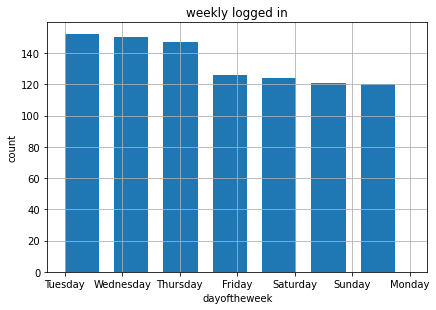

In [16]:
plt.hist(df['dayoftheweek'],bins=7,width=0.6)
plt.tight_layout()
plt.xlabel('dayoftheweek')
plt.ylabel('count')
plt.title('weekly logged in')
plt.grid()


<AxesSubplot:xlabel='totalsteps', ylabel='calories'>

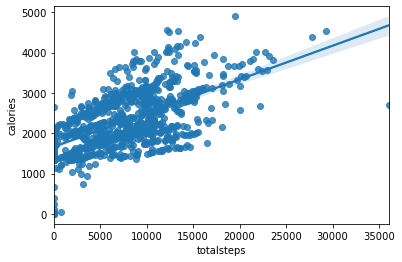

In [17]:
sns.regplot(x='totalsteps',y='calories',data=df)

In [18]:
df[['totalsteps','calories']].corr()

,totalsteps,calories
totalsteps,1.000000,0.591568
calories,0.591568,1.000000


it's a posative coorealatiion. This means the more steps the Fitbit users took, the more calories they burned.

<AxesSubplot:xlabel='veryactiveminutes', ylabel='calories'>

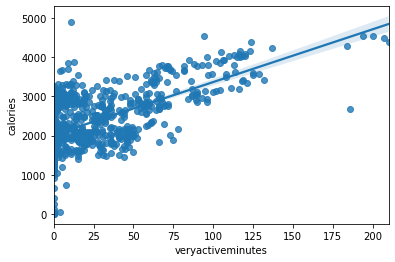

In [19]:
sns.regplot(x='veryactiveminutes',y='calories',data=df)

In [20]:
df[['veryactiveminutes','calories']].corr()

,veryactiveminutes,calories
veryactiveminutes,1.000000,0.615838
calories,0.615838,1.000000


it's a posative relationship between veryactiveminutes and calories. 
This means that the more physical activity the participant did, the more calories they burned.

<AxesSubplot:xlabel='totalhour', ylabel='calories'>

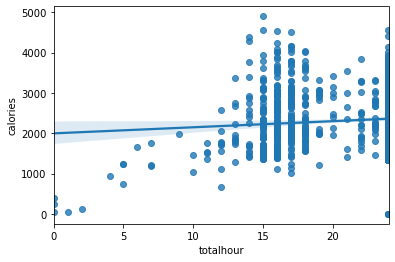

In [21]:
sns.regplot(x='totalhour',y='calories',data=df)

There is no corelation between calories and totalhour.

In [22]:
df.columns

Index(['id', 'activitydate', 'totalsteps', 'totaldistance', 'trackerdistance',
       'loggedactivitiesdistance', 'veryactivedistance',
       'moderatelyactivedistance', 'lightactivedistance',
       'sedentaryactivedistance', 'veryactiveminutes', 'fairlyactiveminutes',
       'lightlyactiveminutes', 'sedentaryminutes', 'calories', 'dayoftheweek',
       'totalminutes', 'totalhour'],
      dtype='object')

In [23]:
very_actv_mins= df['veryactiveminutes'].sum()
light_active_mins=df['lightlyactiveminutes'].sum()
fairly_active_mins=df['fairlyactiveminutes'].sum()
sedentary_active_mins=df['sedentaryminutes'].sum()

In [24]:
all_minutes= [very_actv_mins,light_active_mins,fairly_active_mins,sedentary_active_mins]

In [25]:
mylabels=['very_actv_mins','light_active_mins','fairly_active_mins','sedentary_active_mins']
colours = ["lightcoral", "yellowgreen", "lightskyblue", "darkorange"]
explode = [0, 0, 0, 0.1]

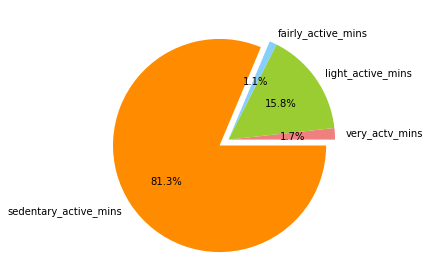

In [26]:
plt.pie(all_minutes,labels=mylabels,colors=colours,explode = explode,autopct = "%1.1f%%")
plt.tight_layout()


1.Sedentary minutes takes the biggest slice at 81.3%.

2.This indicates that users are using the FitBit app to log daily activities such as daily commute, inactive movements (moving from one spot to another) or running errands.

3.App is rarely being used to track fitness (ie. running) as per the minor percentage of fairly active activity (1.1%) and very active activity (1.7%).
This is highly discouraging as FitBit app was developed to encourage fitness.

# Step6: Act

**Base on our Analysis these trends identified**

1.Majority of users (81.3%) are using the FitBit app to track sedentary activities and not using it for tracking their health habits.

2.Users prefer to track their activities during weekdays as compared to weekends - perhaps because they spend more time outside on weekdays and stay in on weekends

**recommendations for bellabeat app**

1.Enable notifications to encourage activity if a user has been sedentary for an extended period of time.

2.Both companies develop products focused on providing women with their health, habit and fitness data and encouraging them to understand their current habits and make healthy decisions. 

3.If users are interested in losing weight, enable notifications to keep users on track to burn necessary calories to meet goal.

4.On weekends, Bellabeat app can also prompt notification to encourage users to exercise.

5.Bellabeat marketing team can encourage users by educating and equipping them with knowledge about fitness benefits, suggest different types of exercise (ie. simple 10 minutes exercise on weekday and a more intense exercise on weekends) and calories intake and burnt rate information on the Bellabeat app.